# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

/var/folders/ws/m03sh3xd4ns621mckfrht3r0000_08/T/ipykernel_82147/2538642985.py:1: DtypeWarning: Columns (204) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("./rbfs/phi_short_reduce.csv")


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,194,195,196,197,198,199,200,y,site,date
0,0,1.000000,0.962154,0.856997,0.706648,0.539408,0.381171,0.249352,0.151007,0.084658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005.0,2023-01-01
1,1,0.999994,0.963078,0.858649,0.708695,0.541492,0.383014,0.250800,0.152030,0.085314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005.0,2023-01-01
2,2,0.999976,0.963992,0.860293,0.710738,0.543578,0.384861,0.252253,0.153059,0.085974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005.0,2023-01-01
3,3,0.999946,0.964894,0.861931,0.712779,0.545666,0.386713,0.253711,0.154092,0.086639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005.0,2023-01-01
4,4,0.999903,0.965785,0.863561,0.714817,0.547755,0.388568,0.255175,0.155131,0.087307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005.0,2023-01-01


In [21]:
## Alternate for site samples
train = dat[dat.site != 2005]
print(train.shape)
X_train = train.iloc[:, 1:202]
y_train = train['y']

(5004, 205)


In [22]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
715,1.000000,0.962154,0.856997,0.706648,0.539408,0.381171,0.249352,0.151007,0.084658,0.043937,...,0.003006,4.667982e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,0.999994,0.963078,0.858649,0.708695,0.541492,0.383014,0.250800,0.152030,0.085314,0.044320,...,0.003006,4.667982e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717,0.999976,0.963992,0.860293,0.710738,0.543578,0.384861,0.252253,0.153059,0.085974,0.044706,...,0.003006,4.667982e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,0.999946,0.964894,0.861931,0.712779,0.545666,0.386713,0.253711,0.154092,0.086639,0.045095,...,0.003006,4.667982e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719,0.999903,0.965785,0.863561,0.714817,0.547755,0.388568,0.255175,0.155131,0.087307,0.045487,...,0.003006,4.667982e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
## Alternate for site samples
test = dat[dat.site == 2005]
print(test.shape)
X_test = test.iloc[:, 1:202]
y_test = test['y']

(715, 205)


(array([ 351.,  254.,  347.,  315.,  422.,  679.,  738., 1153.,  634.,
         111.]),
 array([0.    , 0.0044, 0.0088, 0.0132, 0.0176, 0.022 , 0.0264, 0.0308,
        0.0352, 0.0396, 0.044 ]),
 <BarContainer object of 10 artists>)

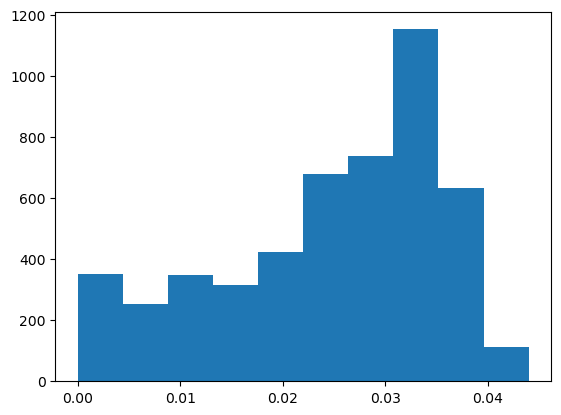

In [24]:
plt.hist(y_train)

## TensorFlow

In [25]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [26]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [27]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               103424    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 596225 (2.27 MB)
Trainable params: 5962

In [28]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [29]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 0s 41ms/step - loss: 0.1485 - mae: 0.1485 - mse: 0.0330 - val_loss: 0.0728 - val_mae: 0.0728 - val_mse: 0.0060
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0348 - mae: 0.0348 - mse: 0.0020 - val_loss: 0.0310 - val_mae: 0.0310 - val_mse: 0.0012
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0246 - mae: 0.0246 - mse: 7.8057e-04 - val_loss: 0.0329 - val_mae: 0.0329 - val_mse: 0.0012
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0196 - mae: 0.0196 - mse: 5.2008e-04 - val_loss: 0.0163 - val_mae: 0.0163 - val_mse: 3.6456e-04
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0144 - mae: 0.0144 - mse: 3.0289e-04 - val_loss: 0.0183 - val_mae: 0.0183 - val_mse: 4.5327e-04
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0115 - mae: 0.0115 - mse: 1.9363e-04 - val_loss: 0.0108 - val_mae: 0.0108 - val_mse: 1.5937e-04
Epoch 

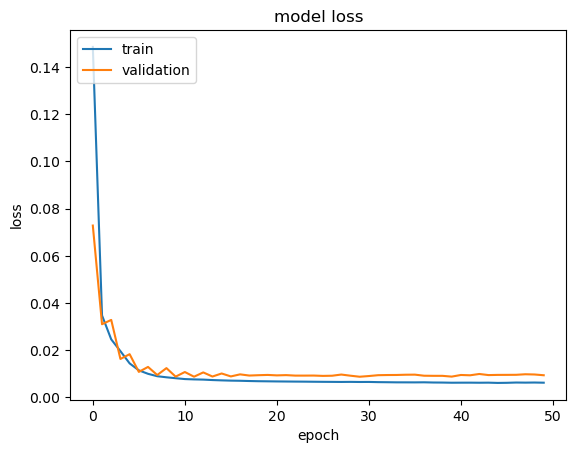

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

23/23 [==============================] - 0s 1ms/step


0.010011369407176972

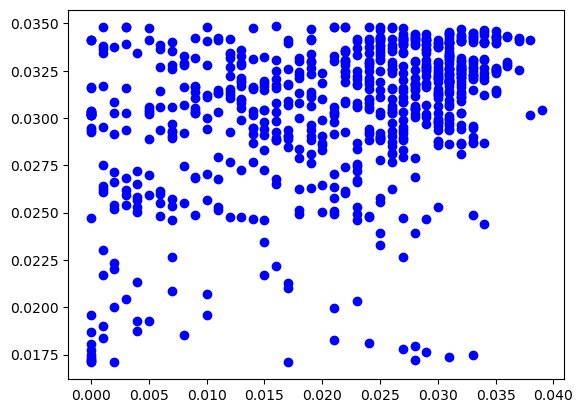

In [32]:
plt.plot(y_test, y_test_pred, 'bo')

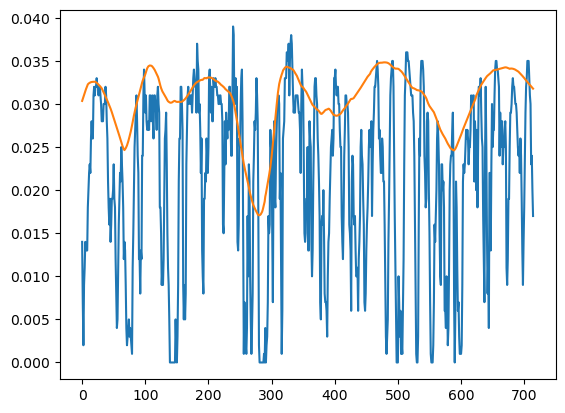

In [33]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

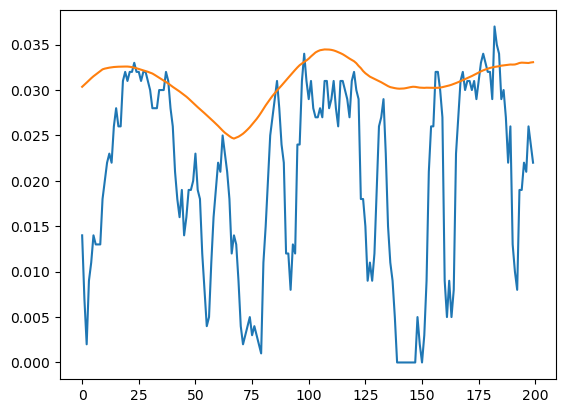

In [34]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()